In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = df.drop(['num_ligne','ID_Client','Nom', 'Score_Credit','Pays','Tenure','Num_Produit','il_a_CrCard','Salaire_estime',], axis=1)

In [2]:
df = pd.read_csv('data.csv')
df

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#affichage occurences et leurs valeurs
df['Pays'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pays, dtype: int64

In [5]:
df['Sex'].value_counts()

Male      5457
Female    4543
Name: Sex, dtype: int64

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Nettoyage des données

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
df['Pays'] = encoder.fit_transform(df['Pays'])
df['Sex'] = encoder.fit_transform(df['Sex'])

In [9]:
df = df.drop(['num_ligne','ID_Client','Nom', 'Score_Credit','Pays','Tenure','Num_Produit','il_a_CrCard','Salaire_estime',], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           10000 non-null  int32  
 1   Age           10000 non-null  int64  
 2   Balance       10000 non-null  float64
 3   Membre_actif  10000 non-null  int64  
 4   Exited        10000 non-null  int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 351.7 KB


### Répartition des données

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.iloc[:,:-1].copy()
y = df.Exited.copy()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [41]:
X_train

array([[-1.09598752, -0.4693113 , -1.22584767, -1.03067011],
       [ 0.91241915,  0.29351742, -0.01289171,  0.97024255],
       [-1.09598752, -0.94607926,  0.57507592, -1.03067011],
       ...,
       [ 0.91241915, -0.37395771,  1.35890908, -1.03067011],
       [-1.09598752, -0.08789694, -1.22584767,  0.97024255],
       [-1.09598752,  0.86563897,  0.50630343, -1.03067011]])

In [42]:
donnees_train = X_train.copy()
donnees_test = X_test.copy()
index_train = [i for i in range(len(donnees_train))]
index_test = [i for i in range(len(donnees_test))]
colonnes = ['Sex', 'Age','Balance','Membre_actif']

X_train = pd.DataFrame(data=donnees_train,index=index_train, columns=colonnes)
X_test = pd.DataFrame(data=donnees_test,index=index_test, columns=colonnes)

### Modèle RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           8000 non-null   float64
 1   Age           8000 non-null   float64
 2   Balance       8000 non-null   float64
 3   Membre_actif  8000 non-null   float64
dtypes: float64(4)
memory usage: 312.5 KB


In [45]:
clf = RandomForestClassifier(n_estimators=1000)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
time = end-start
print("Durée: " + format(time, '.2f'))

Durée: 7.68


In [46]:
predicted_y_test = clf.predict(X_test)

In [47]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y_test)))

Accuracy: 0.8075



### Réseau Neurones

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [103]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,input_dim=4,  activation='relu'),
    tf.keras.layers.Dense(256,input_dim=4,  activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 67,329
Trainable params: 67,329
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [105]:
X_train.shape

(8000, 4)

In [106]:
y_train.shape

(8000,)

In [112]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
)

Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8340
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8328
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8319
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8315
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4021 - accuracy: 0.8330
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8332
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8322
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3999 - accuracy: 0.8331
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.8326
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8316


In [113]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

63/63 - 0s - loss: 0.3949 - accuracy: 0.8440


In [114]:
prediction = model.predict_classes(X_test)

In [115]:
np.unique(prediction)

array([0, 1])

Text(0.5, 1.0, 'Matrice de confusion')

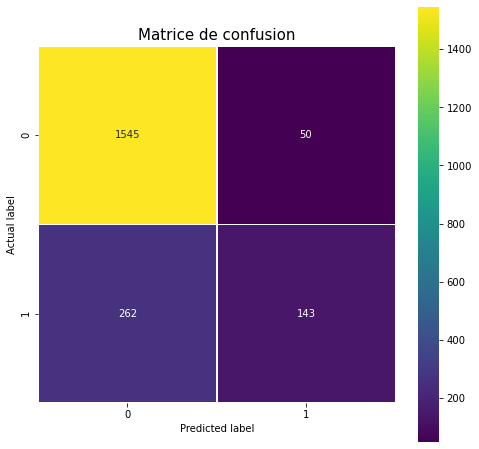

In [116]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)